In [1]:
# prepare library
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn.metrics as m
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# load csv data
dataset = pd.read_csv('cured-dataset.csv')

# run this line if you are using google colab for cloud data mining

url = 'https://drive.google.com/file/d/1Y12elt21Gf28rxXG9X_sC2yKKmKMzXin/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

dataset = pd.read_csv(path, delimiter = ';')
dataset

#features and target
X = dataset.drop('cured', axis=1)
y = dataset.cured
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

#create an instance and fit the model 
logmodel = LogisticRegression(solver='lbfgs', max_iter = 1000)
logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_train)

print("Confusion matrix for train set")
print(confusion_matrix(y_train, predictions))
print("Accuracy",accuracy_score(y_train,predictions))
print("Precision",precision_score(y_train,predictions))
print("F Measure",f1_score(y_train,predictions))
print("Recall",recall_score(y_train,predictions))

predictions = logmodel.predict(X_test)
print("Confusion matrix for test set")
print(confusion_matrix(y_test, predictions))
print("Accuracy",accuracy_score(y_test,predictions))
print("Precision",precision_score(y_test,predictions))
print("F Measure",f1_score(y_test,predictions))
print("Recall",recall_score(y_test,predictions))

FileNotFoundError: ignored

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


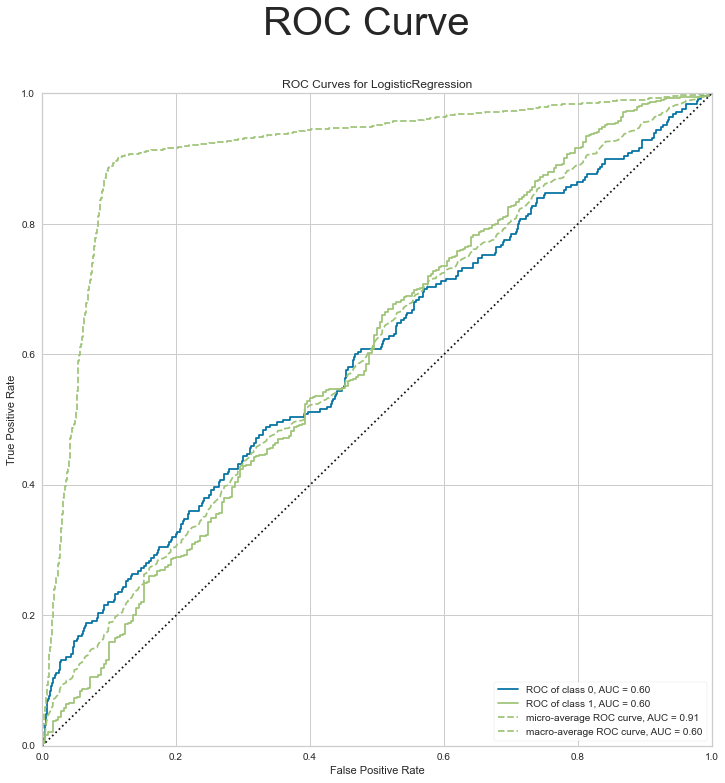

In [ ]:
from yellowbrick.classifier.rocauc import roc_auc

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12));
fig.suptitle('ROC Curve', fontsize = 40)
curve = roc_auc(logmodel, X_train, y_train, X_test = X_test, y_test = y_test, classes=[0,1], ax = ax)
fig.savefig('logRes-cured-ROC-AUC.pdf')